# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# load the dataset

In [2]:
df = pd.read_csv('framingham.csv')

# check the dataset

In [4]:
# check the number of columns
print(f'Number of columns: {df.shape[1]}')

# check the number of rows
print(f'Number of rows: {df.shape[0]}')

Number of columns: 16
Number of rows: 4240


# Check the dataset

In [5]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# drop education column, because it is not useful for heart attack disease prediction

In [10]:
df.drop('education', axis=1, inplace=True)

# check for null-nan values

In [11]:
df.isnull().mean() * 100

male               0.000000
age                0.000000
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

# replace nan values with the mean value of each column which contains nan values

In [17]:
df.fillna(df.mean(), inplace=True)

In [19]:
df.isnull().mean() * 100

male               0.0
age                0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [22]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.000000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52,0,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,0,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


# Make plots

<Axes: title={'center': 'Heart Disease for next 10 Years by gender(0=women, 1=men'}, xlabel='male', ylabel='TenYearCHD'>

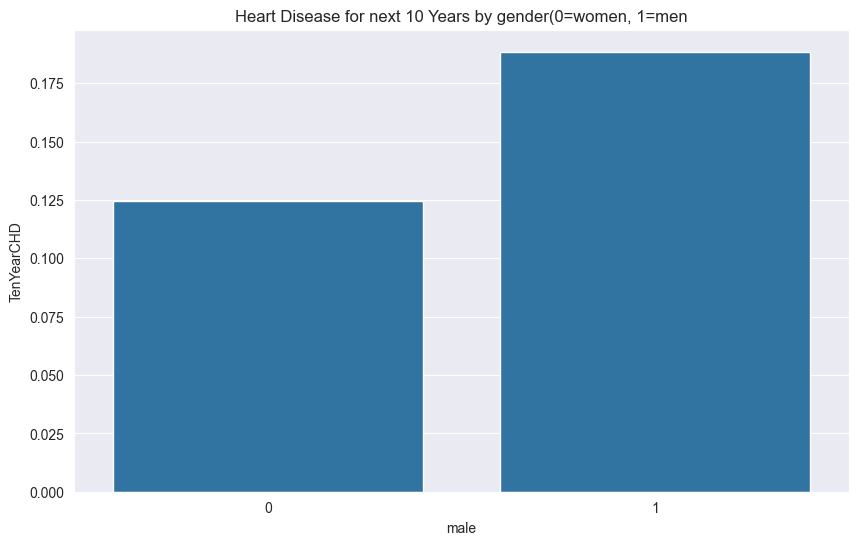

In [30]:
plt.figure(figsize=(10, 6))
plt.title('Heart Disease for next 10 Years by gender(0=women, 1=men')
sns.barplot(data=df, x='male', y='TenYearCHD', errorbar=None)

<Axes: title={'center': 'Heart Disease Prediction By Age'}, xlabel='age', ylabel='TenYearCHD'>

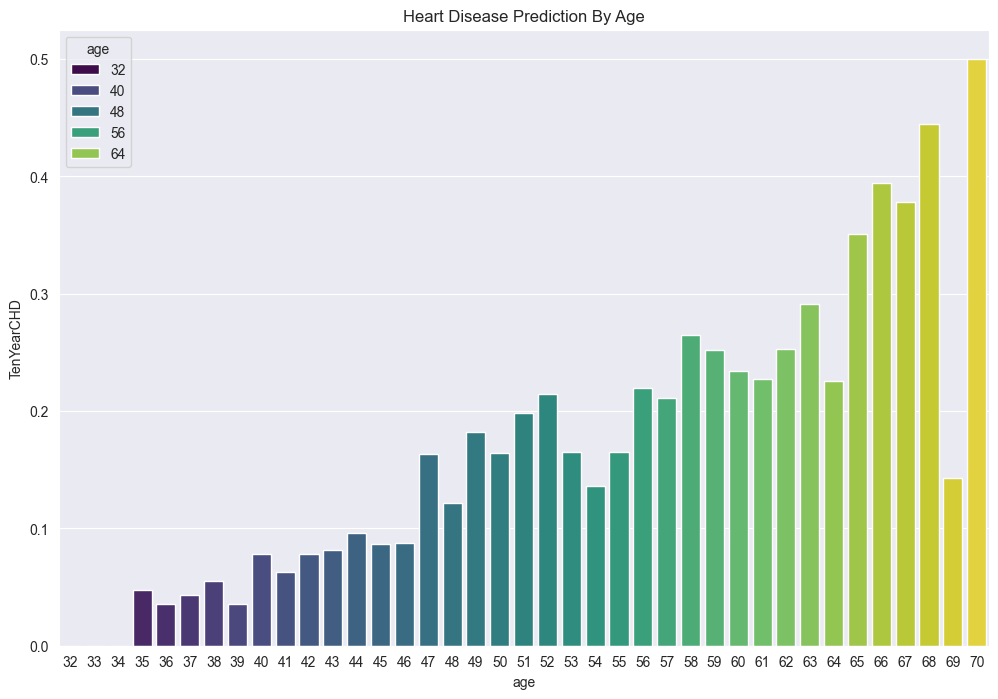

In [81]:
plt.figure(figsize=(12, 8))

plt.title('Heart Disease Prediction By Age')
sns.barplot(data=df, x='age', y='TenYearCHD', hue='age', errorbar=None, palette='viridis')

<Axes: title={'center': 'Heart Disease By Smoking'}, xlabel='currentSmoker', ylabel='TenYearCHD'>

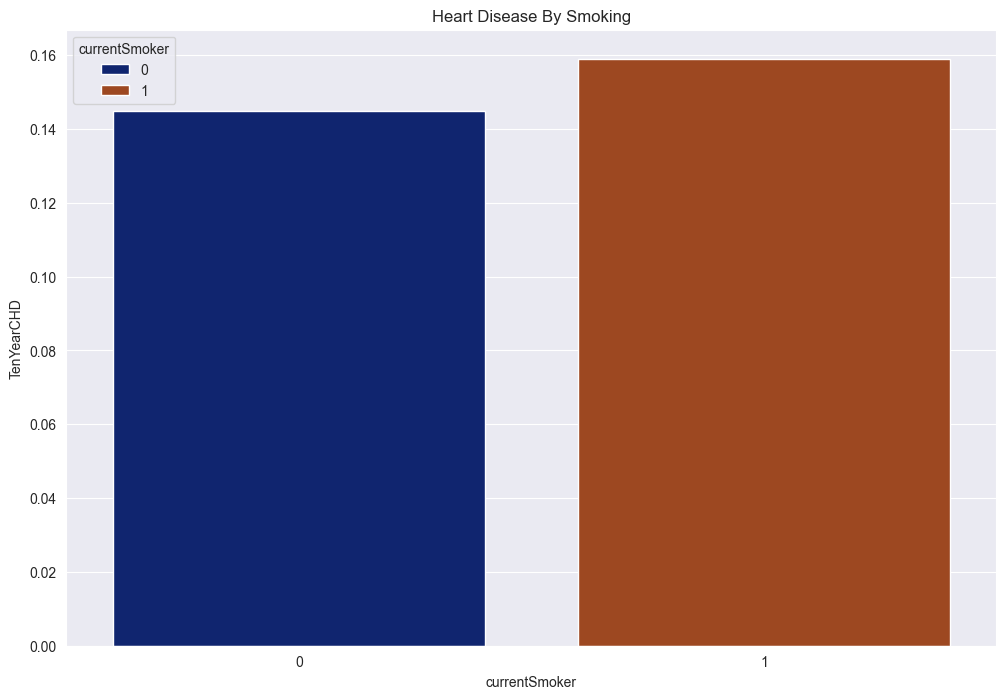

In [88]:
plt.figure(figsize=(12, 8))

plt.title('Heart Disease By Smoking')

sns.barplot(data=df, x='currentSmoker', y='TenYearCHD', hue='currentSmoker', errorbar=None, palette='dark')

In [96]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.000000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52,0,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,0,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


# Split the dataset

In [109]:
# import train_split function
from sklearn.model_selection import train_test_split

# all columns except the target column
X = df.drop('TenYearCHD', axis=1)

# target column
y = df['TenYearCHD']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression Model

In [114]:
# import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# create an object of Logistic Regression Model
lr = LogisticRegression(max_iter=10000)

# fit the model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# Model Predictions

In [118]:
# import accuracy score, confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score

# predictions
y_pred = lr.predict(X_test)

# model accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8608490566037735


# Classification Report

In [120]:
report = classification_report(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print(f'F1 Score: {f1}')

F1 Score: 0.14492753623188406


In [122]:
print(report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       722
           1       0.83      0.08      0.14       126

    accuracy                           0.86       848
   macro avg       0.85      0.54      0.53       848
weighted avg       0.86      0.86      0.81       848



# Confusion Matrix

In [126]:
cm = confusion_matrix(y_test, y_pred)

# create dataframe with the confusion matrix as data

confusion_matrix = pd.DataFrame(
    data=cm,
    columns=['Predicted', 'Actual'],
    index=['Predicted', 'Actual']
)

# create heatmap based on this new df

<Axes: >

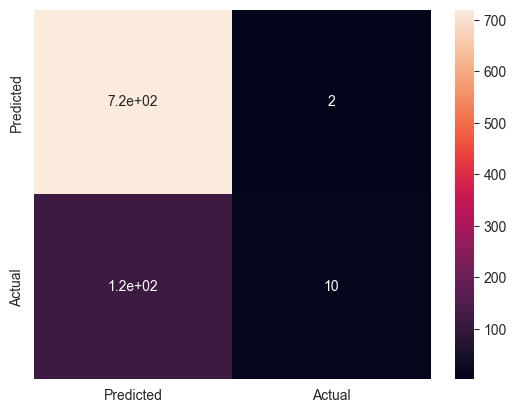

In [129]:
sns.heatmap(confusion_matrix, annot=True)